# Heart Disease prediction

In this project I am going to use machine learning algoritms to predict wheater someone have heart disease or not. I will use Logistic Regression, Random Forest and XGBoost models for classification. I used the dateset from https://www.kaggle.com/johnsmith88/heart-disease-dataset. It contains 14 attributes (symptoms), including the predicted attribute.

## Data description
1. age - age in years
2. sex 
    * 0: female
    * 1: male
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
5. chol - serum cholestoral in mg/dl
6. fbs - (fasting blood sugar > 120 mg/dl) 
    * 0: false
    * 1: true
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina 
    * 0: no
    * 1: yes 
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
13. thal - thalium stress result
14. target - have disease or not
    * 0: no
    * 1: yes


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Heart-Disease-prediction" data-toc-modified-id="Heart-Disease-prediction-2">Heart Disease prediction</a></span><ul class="toc-item"><li><span><a href="#Data-description" data-toc-modified-id="Data-description-2.1">Data description</a></span><ul class="toc-item"><li><span><a href="#1.-Importing-Libraries" data-toc-modified-id="1.-Importing-Libraries-2.1.1">1. Importing Libraries</a></span></li><li><span><a href="#2.-Loading-and-Cleaning-the-Data" data-toc-modified-id="2.-Loading-and-Cleaning-the-Data-2.1.2">2. Loading and Cleaning the Data</a></span></li><li><span><a href="#3.-Training-the-model" data-toc-modified-id="3.-Training-the-model-2.1.3">3. Training the model</a></span><ul class="toc-item"><li><span><a href="#3.1-Logistic-Regression" data-toc-modified-id="3.1-Logistic-Regression-2.1.3.1">3.1 Logistic Regression</a></span></li><li><span><a href="#3.2-Random-Forest" data-toc-modified-id="3.2-Random-Forest-2.1.3.2">3.2 Random Forest</a></span></li><li><span><a href="#3.3-XGBoost" data-toc-modified-id="3.3-XGBoost-2.1.3.3">3.3 XGBoost</a></span></li></ul></li><li><span><a href="#4.-Model-Evaluation" data-toc-modified-id="4.-Model-Evaluation-2.1.4">4. Model Evaluation</a></span></li><li><span><a href="#5.-Influence-of-parameters-on-prediction" data-toc-modified-id="5.-Influence-of-parameters-on-prediction-2.1.5">5. Influence of parameters on prediction</a></span></li><li><span><a href="#6.-Models-comparison" data-toc-modified-id="6.-Models-comparison-2.1.6">6. Models comparison</a></span></li></ul></li><li><span><a href="#Save-results" data-toc-modified-id="Save-results-2.2">Save results</a></span></li></ul></li></ul></div>

<a id="id_load"></a>
### 1. Importing Libraries

In [3]:
import numpy as np
import pandas as pd 
import seaborn as sn
import xgboost as xgb
import pickle
import graphviz 
import shap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve
from sklearn.metrics import plot_confusion_matrix, accuracy_score, balanced_accuracy_score, recall_score, precision_score,f1_score, confusion_matrix, plot_roc_curve
from sklearn import tree

In [2]:
#import os
#os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

### 2. Loading and Cleaning the Data

In [4]:
data = pd.read_csv('./heart.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


As we can notice in this dateset we do not have any null valuse so we can leave it as it is. To make date more readable I will chcange the name of each column.

In [5]:
data = data.rename(columns = {'age':'Age','sex':'Sex','cp':'Chest pain type','trestbps':'Resting blood pressuer','chol':'Cholestoral','fbs':'Fasting blood sugar > 120 md/dl','restecg':'Resting electrocardiographic results','oldpeak':'Depression induced by exercise','thalach':'Maximum heart rate achived','exang':'Exercise induced angin','slope':'The slope of the peak exercise ST segment','ca':'Number of major vessels','thal':'Thalium stress result','target':'Target'})
data

,Age,Sex,Chest pain type,Resting blood pressuer,Cholestoral,Fasting blood sugar > 120 md/dl,Resting electrocardiographic results,Maximum heart rate achived,Exercise induced angin,Depression induced by exercise,The slope of the peak exercise ST segment,Number of major vessels,Thalium stress result,Target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


Now I will check the correlations between variables.

In [6]:
data_num = data[['Age','Resting blood pressuer','Cholestoral','Maximum heart rate achived','Depression induced by exercise']]
print(data_num.var())

Age                                 82.306450
Resting blood pressuer             306.835410
Cholestoral                       2661.787109
Maximum heart rate achived         529.263325
Depression induced by exercise       1.380750
dtype: float64


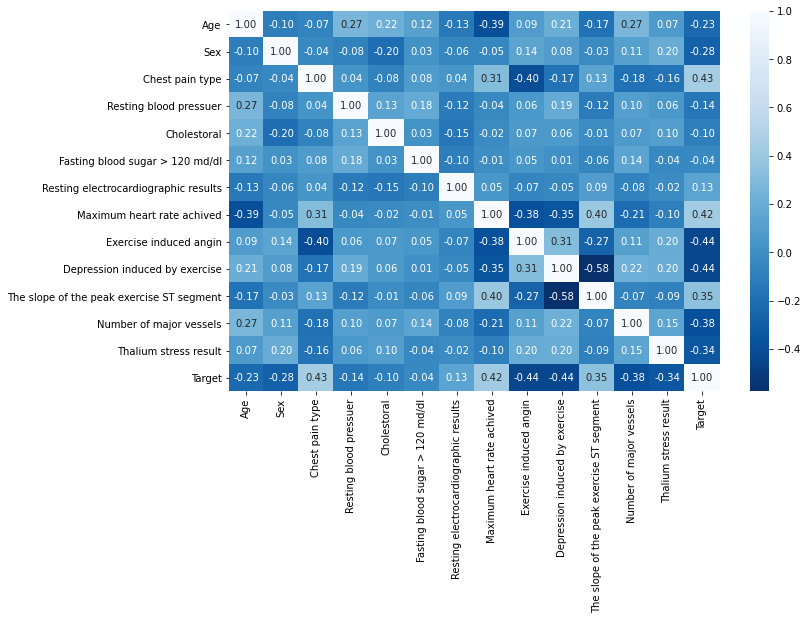

In [7]:
corr_matrix = data.corr()
fig ,ax = plt.subplots(figsize = (11 , 7))
ax = sn.heatmap(corr_matrix, annot=True, fmt='.2f',cmap = 'Blues_r')

The last step in data preparation is to divide the dataset into two subsets. One for training the model and second one for testing. 

In [45]:
X = data.drop('Target', axis=1)
y = data['Target']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# is it okey ?
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((820, 13), (205, 13), (820,), (205,))

### 3. Training the model

#### 3.1 Logistic Regression 

My first training model will be the Logistic Regression.

In [10]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression(max_iter=10000,random_state=1)
reg.fit(X_train, y_train)
predictions_1 = reg.predict(X_test)
score_1 = accuracy_score(predictions_1, y_test)
score_1
predictions_1

0.8634146341463415

This model does not behave very well. Let's try to find better parameters.

In [12]:
param_range = np.logspace(-3,6, 10)
train_scores, test_scores = validation_curve(reg, X_train, y_train,param_name='C', param_range=param_range,cv=10)

In [13]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

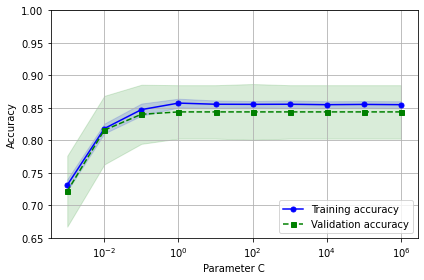

In [14]:
plt.plot(param_range, train_mean, color="blue", marker="o", 
         markersize=5, label="Training accuracy")
plt.fill_between(param_range, train_mean+train_std, train_mean-train_std, alpha=0.15, color="blue")
plt.plot(param_range, test_mean, color="green", marker="s",
         linestyle="--", markersize=5, label="Validation accuracy")
plt.fill_between(param_range, test_mean+test_std, test_mean-test_std, alpha=0.15, color="green")

plt.grid()
plt.xscale("log")
plt.legend(loc='lower right')
plt.xlabel("Parameter C")
plt.ylabel("Accuracy")
plt.ylim([0.65,1.0])
plt.tight_layout()
plt.show()

As we can see on this graph changing the paramter C will not improve my model.

#### 3.2 Random Forest

My next model is Random Forest.

In [15]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(max_depth=2,n_estimators=10)
RF = RF.fit(X_train,y_train)
predictions_2 = RF.predict(X_test)
score_2 = accuracy_score(predictions_2, y_test)
score_2

0.8536585365853658

Again, this model does not have very well result. I will try to improve this model using cross validation.

In [32]:
def find_best_max_depth(X_train, y_train):
    best_n = 2
    best_score = 0
    X_colum_num = X.shape[1]  
    for k in range(1, int(X_colum_num)):
        model = RandomForestClassifier(max_depth=k,n_estimators = 10)
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
        mean_score = scores.mean()
        if mean_score > best_score:
            best_n = k
            best_score = mean_score
    return best_n

In [53]:
n = find_best_max_depth(X_train,y_train)
n

9

In [35]:
RF = RandomForestClassifier(max_depth=n,n_estimators=10, random_state=2)
RF = RF.fit(X_train,y_train)
predictions_bis2 = RF.predict(X_test)
score_bis2 = accuracy_score(predictions_bis2, y_test)
score_bis2

1.0

Now we achived 100% accuracy. 

We can see how this model works in the following plot.

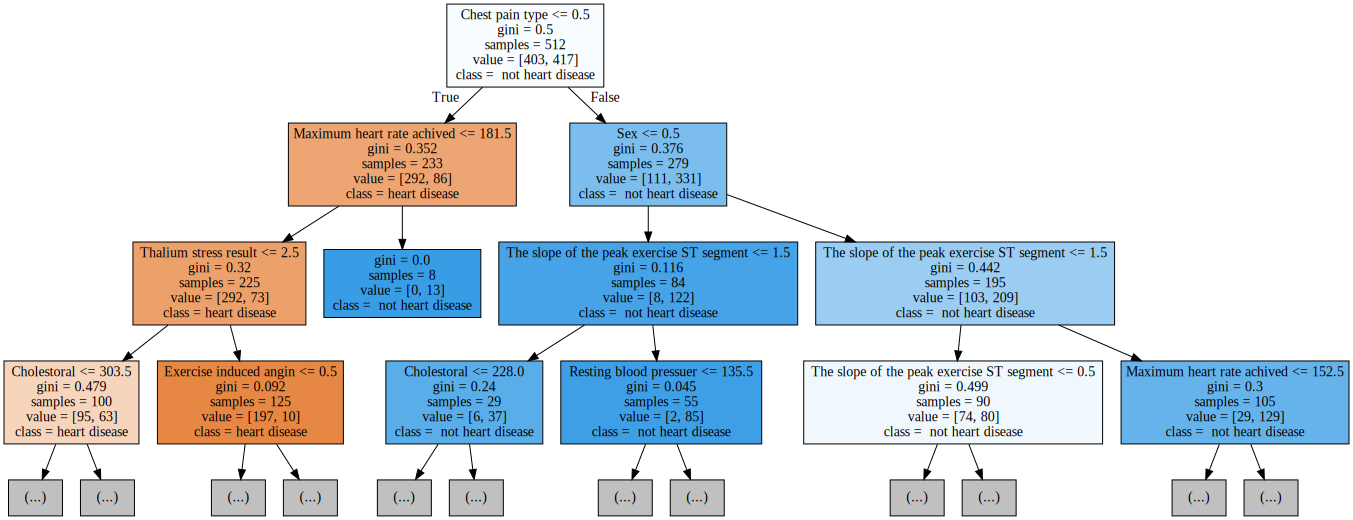

In [49]:

dt = tree.export_graphviz(RF.estimators_[0], feature_names=X.columns, filled=True,max_depth=3, class_names=['heart disease',' not heart disease'])
tr = graphviz.Source(dt)
tr

#### 3.3 XGBoost 

The last model will be XGboost Classifier.

In [21]:
xgb_model = xgb.XGBClassifier()
class_xgb = xgb_model.fit(X_train,y_train)
predictions_3 = class_xgb.predict(X_test)
score_3 = accuracy_score(predictions_3,y_test)
score_3

1.0

Using default parameters we obtained 100% accuracy.

### 4. Model Evaluation

We are going to evaluate XGBoost model.

[1.0, 1.0, 1.0, 1.0, 1.0]

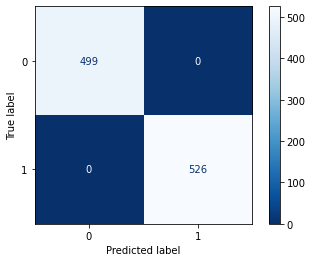

In [22]:
metrics = ['accuracy', 'balanced_accuracy', 'recall', 'precision', 'f_measure']
plot_confusion_matrix(xgb_model,X,y,cmap = 'Blues_r')
accuracy = score_3
balanced_accuracy = balanced_accuracy_score(y_test, predictions_3)
recall = recall_score(y_test, predictions_3, average='weighted')
precision = precision_score(y_test, predictions_3, average='weighted')
F1 = f1_score(y_test,predictions_3, average='macro')
scores_REG = [accuracy, balanced_accuracy, recall, precision, F1]
scores_REG

Due to 100% accuracy, this model does not misclassify any sample and we can see it in this matrix. Next we will look at the metrics for this model and the ROC curve.

In [23]:
def plot_metrics_for_model(model,metr,scores):
    fig = plt.figure(figsize=(10,5))
    y_pos = np.arange(len(scores))
    plt.bar(y_pos,scores, color='blue')
    plt.ylim([0,1])
    plt.xticks(y_pos, metr)
    plt.xlabel('rodzaj metryki', fontsize=12)
    plt.ylabel('Dokładność', fontsize=12)
    plt.title('Porównanie dla '+ model, fontsize=16)
    plt.show()

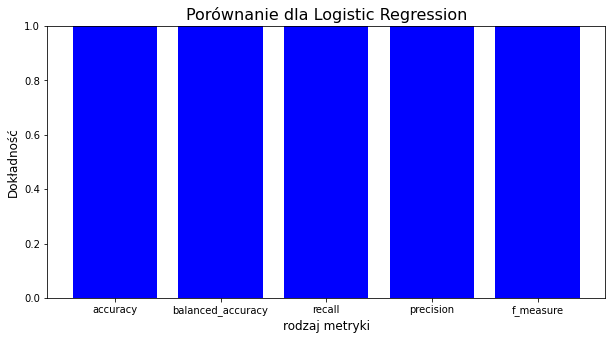

In [24]:
plot_metrics_for_model('XGBoost',metrics,scores_REG)

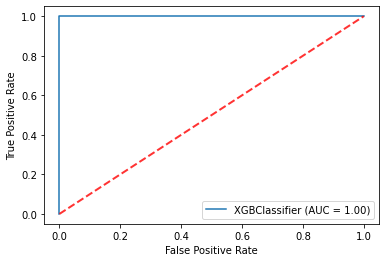

In [25]:
fig, ax =plt.subplots()
viz = plot_roc_curve(xgb_model,X,y,ax=ax)
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)

### 5. Influence of parameters on prediction

We are going to look at the  influence of parameteres on prediction in Random Forest model.

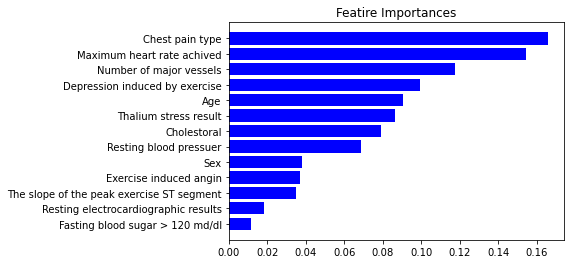

In [26]:
importances = RF.feature_importances_
indices = np.argsort(importances)
feature = X_train.columns

plt.title('Featire Importances')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), feature[indices])
plt.show()

In [27]:
shap_values = shap.TreeExplainer(RF).shap_values(X_train)

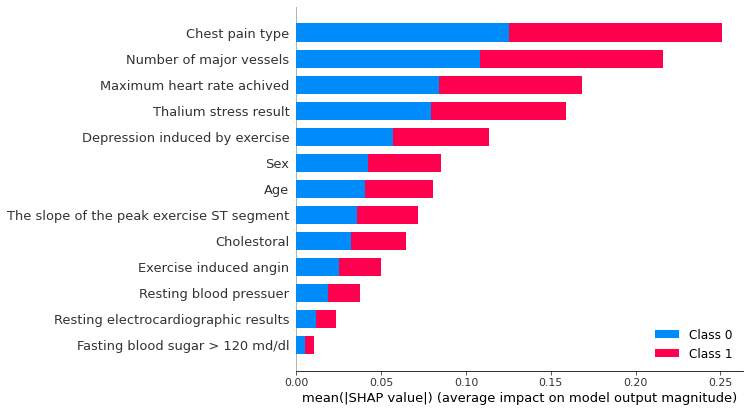

In [28]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

### 6. Models comparison

In this section I want to compare my models. I will compare all models in each metric and plot the confusion matrix.

In [30]:
def one_metric_for_each_model(models,metric):
    #prepare data
    models_name=[]
    metric_scores=[]    
    for model in models:
        pred = model.predict(X_test)
        if metric=='balanced_accuracy':
            met = balanced_accuracy_score(y_test, pred)
        elif metric=='accuracy':
            met = accuracy_score(y_test, pred)
        elif metric=='recall':
            met = recall_score(y_test, pred, average='weighted')
        elif metric=='precision':
            met = precision_score(y_test, pred, average='weighted')
        elif metric=='f_measure':
            met = f1_score(y_test,pred, average='macro')
        
        metric_scores.append(met)
        name = str(model)
        name = name[:name.find('(')]
        models_name.append(str(name))
    #plot    
    fig = plt.figure(figsize=(10,5))
    y_pos = np.arange(len(metric_scores))
    plt.bar(y_pos,metric_scores, color='blue')
    plt.ylim([0,1])
    plt.xticks(y_pos, models_name)
    plt.xlabel('rodzaj modelu', fontsize=12)
    plt.ylabel('Dokładność', fontsize=12)
    plt.title('Porównanie dla '+ metric, fontsize=16)
    plt.show()

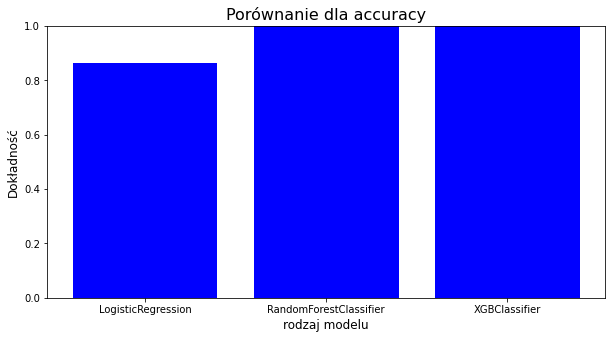

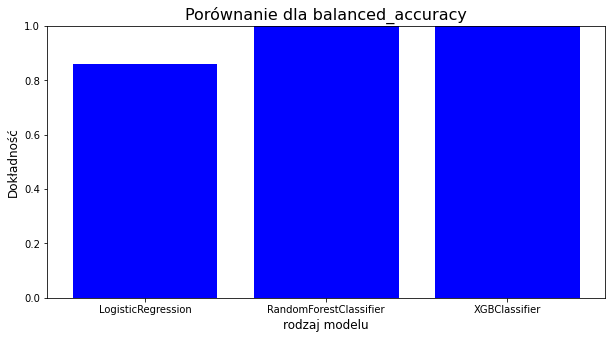

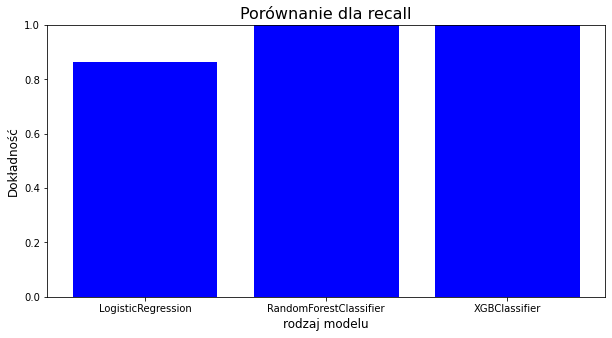

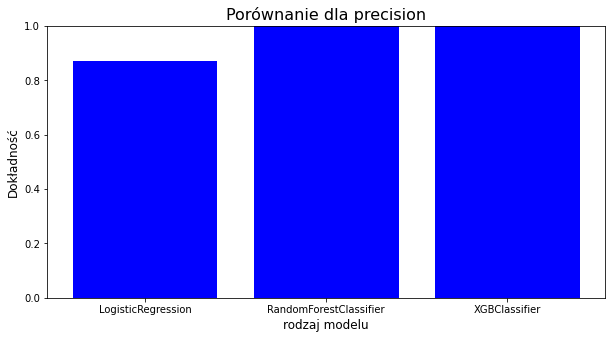

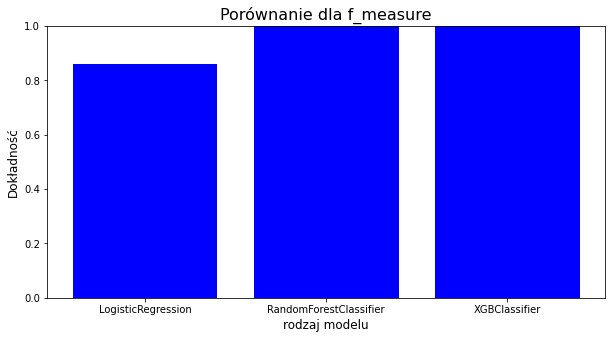

In [31]:
my_models=[reg,RF,xgb_model]
for met in metrics:
    one_metric_for_each_model(my_models,met)
    

Confusion matrix for LogisticRegression
Confusion matrix for RandomForestClassifier
Confusion matrix for XGBClassifier


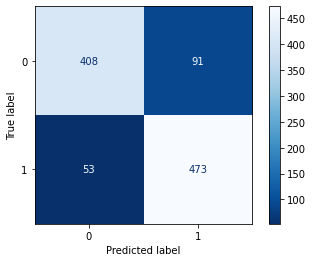

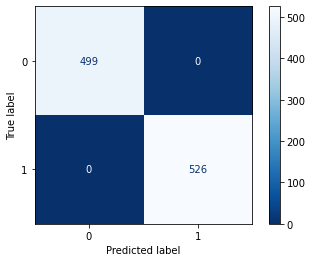

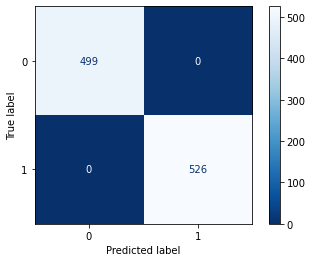

In [39]:
for model in my_models:
        name = str(model)
        name = name[:name.find('(')]
        print('Confusion matrix for '+ name)
        plot_confusion_matrix(model,X,y,cmap = 'Blues_r')

Due to the above plots we can say that Logistic Regression gives the worst results. 

## Save results

In [127]:
regresion = pickle.dumps(reg)
RabFor = pickle.dumps(RF)
xgb = pickle.dumps(xgb_model)